In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from ipywidgets import interact

# Metalic waveguide

In [ ]:
d = 1

eps = lambda w: 3
ky = lambda m: m * np.pi / d
kz = lambda m, w: np.sqrt(w**2 * eps(w) - ky(m)**2)

y = np.linspace(-d/2, d/2, 50).reshape(-1, 1)
z = np.linspace(0, 5, 100).reshape(1, -1)

def u(m):
    if m % 2 == 0:
        return np.sin(ky(m) * y)
    return np.cos(ky(m) * y)

def E_p(m, w, t=0, phi=0):
    return u(m) * np.cos(kz(m, w) * z - w * t + phi)

def E_m(m, w, t=0, phi=0):
    return u(m) * np.cos(-kz(m, w) * z - w * t + phi)



## Single-mode function

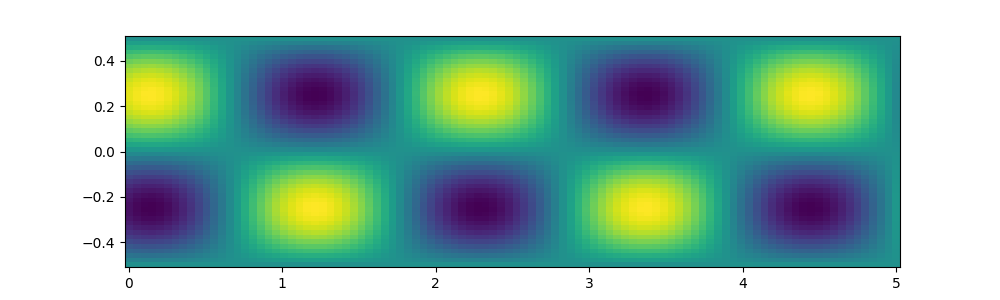

In [4]:
fig = plt.figure(figsize=(10, 3))

plt.pcolormesh(z, y, E_p(2, 4, 0.1))

## Single-mode propagation

interactive(children=(FloatSlider(value=0.0, description='t', max=3.0, step=0.01), Output()), _dom_classes=('w…

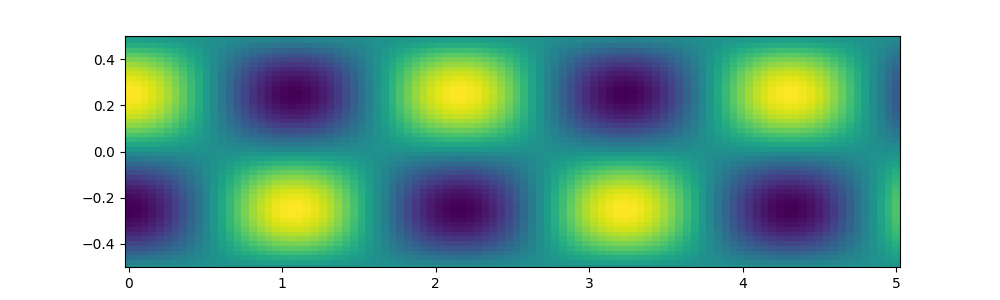

In [5]:
fig, ax = plt.subplots(1, figsize=(10, 3))
mesh_1mode = ax.pcolormesh(z, y, E_p(2, 4, 0), 
                           alpha=1)
ax.set_ylim(-d/2, d/2)

@interact(t=(0, 3, 0.01))
def time_evol(t=0):
    mesh_1mode.set_array(E_p(2, 4, t).ravel())
    plt.draw()

## Multi-mode propagation

In [1]:
fig, ax = plt.subplots(1, figsize=(10, 3))
mesh_2modes = ax.pcolormesh(z, y, np.abs(E_p(1, 4, 0) + E_p(2, 4, 0))**2, 
                           alpha=1)
ax.set_ylim(-d/2, d/2)

@interact(t=(0, 3, 0.01))
def time_evol(t=0):
    mesh_2modes.set_array(np.abs(E_p(1, 4, 0) + E_p(2, 4, t)).ravel()**2)
    plt.draw()

NameError: name 'plt' is not defined

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 3))

c = np.random.rand(M:=3, W:=5)

E_rand = lambda t: sum(c[m, iw] * E_p(m, w, t) for m in range(M) 
                       for iw, w in enumerate(np.linspace(m * np.pi/d, 5*m * np.pi/d/eps(0), W)))

mesh_multi = ax.pcolormesh(z, y, np.abs(E_rand(0))**2, 
                           alpha=1)
ax.set_ylim(-d/2, d/2)

@interact(t=(0, 9, 0.01))
def time_evol(t=0):
    mesh_multi.set_array(np.abs((E_rand(t)).ravel())**2)
    plt.draw()

# Dielectric waveguide

C:\Users\10921\AppData\Local\Temp\ipykernel_29624\3763121091.py:6: RuntimeWarning: divide by zero encountered in divide
  f1 = lambda w: np.sqrt((w / ky)**2 * (n1**2 - n2**2) - 1)
C:\Users\10921\AppData\Local\Temp\ipykernel_29624\3763121091.py:6: RuntimeWarning: invalid value encountered in sqrt
  f1 = lambda w: np.sqrt((w / ky)**2 * (n1**2 - n2**2) - 1)


interactive(children=(FloatSlider(value=3.1, description='w', max=9.0, min=0.01, step=0.01), Output()), _dom_c…

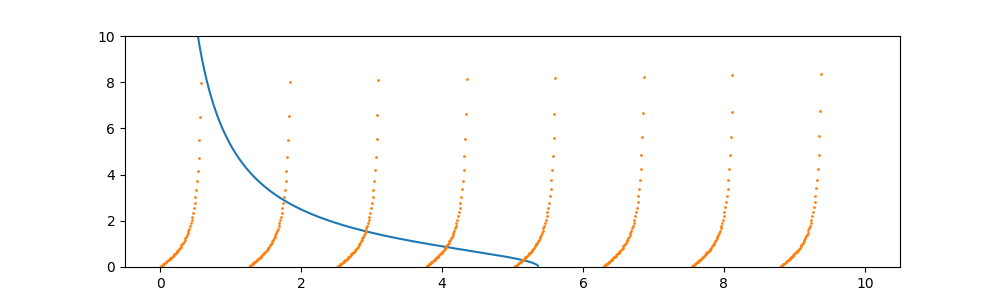

In [28]:
n1, n2, d = 2, 1, 5

m = 2
ky = np.linspace(0, 10, 900)

f1 = lambda w: np.sqrt((w / ky)**2 * (n1**2 - n2**2) - 1)
f2 = np.tan(ky * d / 2 + m * np.pi / 2)

fig, ax = plt.subplots(1, figsize=(10, 3))
ax.set_ylim(0, 10)
line1, = ax.plot(ky, f1(3.1))
line2, = ax.plot(ky, f2, marker="o", ms=1, lw=0)

@interact(w=(0.01, 9, 0.01))
def time_evol(w=3.1):
    line1.set_ydata(f1(w))